<a href="https://colab.research.google.com/github/malakeweis/Book_store/blob/main/malakeweis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Choose DFA type:
1. Starts with
2. Ends with
3. Contains
Enter choice (1/2/3): 2
Enter value (00, 01, 10, or 11): 11


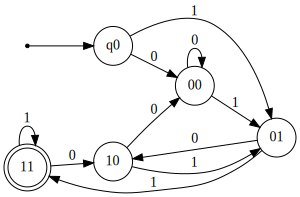

Enter string to test (or 'exit'): exit 
Only 0 and 1 allowed.
Enter string to test (or 'exit'): 0
Start at: q0
Read 0 -> Go to 00
Rejected


KeyboardInterrupt: Interrupted by user

In [1]:
from graphviz import Digraph
from IPython.display import display
import time

# الحالة الرئيسية
class DFA:
    def __init__(self, dfa_type, target_value):
        self.dfa_type = dfa_type
        self.target_value = target_value
        self.states = set()
        self.transitions = {}
        self.start_state = 'q0'
        self.accept_states = set()
        self.alphabet = {'0', '1'}
        self.build_dfa()

    def build_dfa(self):
        if self.dfa_type == "starts_with":
            self.build_starts_with_dfa()
        elif self.dfa_type == "ends_with":
            self.build_ends_with_dfa()
        elif self.dfa_type == "contains":
            self.build_contains_dfa()

    def add_transition(self, from_state, input_symbol, to_state):
        self.states.add(from_state)
        self.states.add(to_state)
        self.transitions[(from_state, input_symbol)] = to_state

    def build_starts_with_dfa(self):
        # Example: target_value = "10"
        s0 = 'q0'
        s1 = 'q1'
        s2 = 'q2'
        self.accept_states.add('q2')
        self.add_transition(s0, self.target_value[0], s1)
        self.add_transition(s1, self.target_value[1], s2)

        for symbol in self.alphabet:
            if symbol != self.target_value[0]:
                self.add_transition(s0, symbol, 'qd')  # dead state
            if symbol != self.target_value[1]:
                self.add_transition(s1, symbol, 'qd')

        for symbol in self.alphabet:
            self.add_transition('q2', symbol, 'q2')
            self.add_transition('qd', symbol, 'qd')

    def build_ends_with_dfa(self):
        # Simple way: keep track of last two symbols only
        self.states = {'q0', 'q1', 'q2', 'q3', 'q4'}
        self.start_state = 'q0'
        for a in self.alphabet:
            self.add_transition('q0', a, 'q1')
            self.add_transition('q1', a, 'q2')
            self.add_transition('q2', a, 'q2')

        # Check if the last 2 characters are the target
        for a in self.alphabet:
            self.add_transition('q2', a, 'q2')

        # Add special transitions for tracking last two characters
        self.transitions.clear()
        self.start_state = 'q0'
        self.states.clear()
        for a in self.alphabet:
            for b in self.alphabet:
                s = a + b
                self.states.add(s)
        self.states.add('q0')
        self.accept_states = {self.target_value}

        for s in self.states:
            for a in self.alphabet:
                next_state = (s + a)[-2:]
                self.add_transition(s, a, next_state)

    def build_contains_dfa(self):
        # Build a DFA that looks for a sequence anywhere in the input
        prefix_len = len(self.target_value)
        for i in range(prefix_len + 1):
            self.states.add(f'q{i}')
        self.accept_states.add(f'q{prefix_len}')

        for i in range(prefix_len + 1):
            for symbol in self.alphabet:
                if i < prefix_len and symbol == self.target_value[i]:
                    self.add_transition(f'q{i}', symbol, f'q{i+1}')
                elif i > 0:
                    fallback = self.longest_prefix_suffix(self.target_value[:i] + symbol)
                    self.add_transition(f'q{i}', symbol, f'q{len(fallback)}')
                else:
                    self.add_transition(f'q{i}', symbol, 'q0')

    def longest_prefix_suffix(self, s):
        for i in range(len(s), 0, -1):
            if s.startswith(s[-i:]):
                return s[-i:]
        return ''

    def visualize(self):
        dot = Digraph()
        dot.attr(rankdir='LR')
        dot.attr('node', shape='doublecircle')
        for state in self.accept_states:
            dot.node(state)

        dot.attr('node', shape='circle')
        for (src, sym), dst in self.transitions.items():
            dot.edge(src, dst, label=sym)

        dot.attr('node', shape='point')
        dot.edge('', self.start_state)

        display(dot)

    def simulate(self, input_string):
        current_state = self.start_state
        print(f"Start at: {current_state}")
        for symbol in input_string:
            time.sleep(0.5)
            key = (current_state, symbol)
            if key not in self.transitions:
                print(f"No transition from {current_state} on {symbol}. Rejected.")
                return False
            current_state = self.transitions[key]
            print(f"Read {symbol} -> Go to {current_state}")
        print("Accepted" if current_state in self.accept_states else "Rejected")
        return current_state in self.accept_states


def main():
    print("Choose DFA type:")
    print("1. Starts with")
    print("2. Ends with")
    print("3. Contains")
    choice = input("Enter choice (1/2/3): ")
    if choice == '1':
        dfa_type = "starts_with"
    elif choice == '2':
        dfa_type = "ends_with"
    elif choice == '3':
        dfa_type = "contains"
    else:
        print("Invalid choice.")
        return

    value = input("Enter value (00, 01, 10, or 11): ")
    if value not in ['00', '01', '10', '11']:
        print("Invalid value.")
        return

    dfa = DFA(dfa_type, value)
    dfa.visualize()

    while True:
        test_str = input("Enter string to test (or 'exit'): ")
        if test_str == 'exit':
            break
        if set(test_str) - {'0', '1'}:
            print("Only 0 and 1 allowed.")
            continue
        dfa.simulate(test_str)

if __name__ == "__main__":
    main()
